In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
def confusion_calcs(confusion_matrix):
    temp_arr = confusion_matrix
    tn = temp_arr[0]
    fp = temp_arr[1]
    fn = temp_arr[2]
    tp = temp_arr[3]
    sensitivity = tp / (tp + fn)
    recall = sensitivity
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    accuracy = (tp+tn) / (tp+tn+fn+fp)
    f1 = 2*precision*recall/(precision+recall)
    return [accuracy, sensitivity, specificity, precision, f1]

In [42]:
knn_eval = confusion_calcs([22634,  2109, 2032, 18193])

In [26]:
catboost_eval = confusion_calcs([23080,  1663, 1777, 18448])

In [27]:
lightgbm_eval = confusion_calcs([23104, 1639, 1720, 18505])

In [28]:
decisiontree_eval = confusion_calcs([22502,  2241, 1791, 18434])

In [29]:
rf_eval = confusion_calcs([23105, 1638, 1707, 18518])

In [30]:
adaboost_eval = confusion_calcs([22760, 1983, 1706, 18519])

In [31]:
gboost_eval = confusion_calcs([23139, 1604, 1738, 18487])

In [32]:
lda_eval = confusion_calcs([23025, 1718, 1956, 18269])

In [33]:
qda_eval = confusion_calcs([22462, 2281, 2327, 17898])

In [47]:
main1_eval = []
main2_eval = []
main1_eval.append(knn_eval)
main1_eval.append(catboost_eval)
main1_eval.append(lightgbm_eval)
main1_eval.append(adaboost_eval)
main1_eval.append(gboost_eval)
main2_eval.append(decisiontree_eval)
main2_eval.append(rf_eval)
main2_eval.append(lda_eval)
main2_eval.append(qda_eval)
#columns = ['Acc.','Sens.','Spec.','Prec.','f1']

[0 1 2 3]


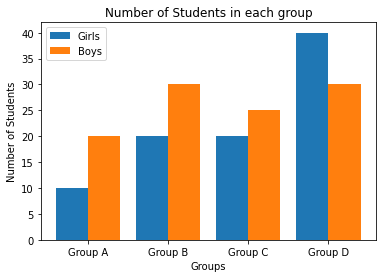

In [57]:
X = ['Group A','Group B','Group C','Group D']
Ygirls = [10,20,20,40]
Zboys = [20,30,25,30]
X_axis = np.arange(len(X))
print(X_axis)
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Girls')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Boys')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

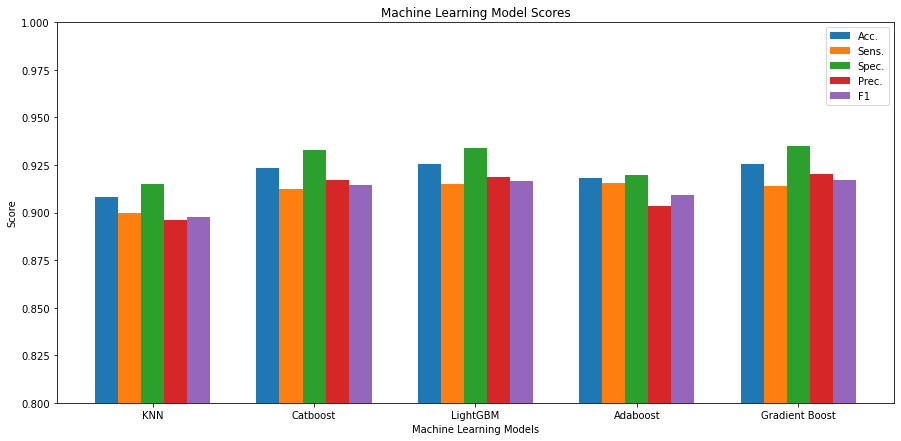

In [79]:
columns = ['KNN', 'Catboost','LightGBM', 'Adaboost', 'Gradient Boost']
fig, axs = plt.subplots(figsize=(15,7))
axs.set_ylim(0.8, 1)
X_axis = np.arange(0, 3.5, 0.7)
acc_list = []
sens_list = []
spec_list = []
prec_list = []
f1_list = []

for model_list in main1_eval:
    acc_list.append(model_list[0])
    sens_list.append(model_list[1])
    spec_list.append(model_list[2])
    prec_list.append(model_list[3])
    f1_list.append(model_list[4])

plt.bar(X_axis - 0.2, acc_list, 0.1, label = 'Acc.')
plt.bar(X_axis - 0.1, sens_list, 0.1, label = 'Sens.')
plt.bar(X_axis, spec_list, 0.1, label = 'Spec.')
plt.bar(X_axis + 0.1, prec_list, 0.1, label = 'Prec.')
plt.bar(X_axis + 0.2, f1_list, 0.1, label = 'F1')

plt.xticks(X_axis, columns)
plt.xlabel("Machine Learning Models")
plt.ylabel("Score")
plt.title("Machine Learning Model Scores")
plt.legend(loc='upper right')
plt.show()

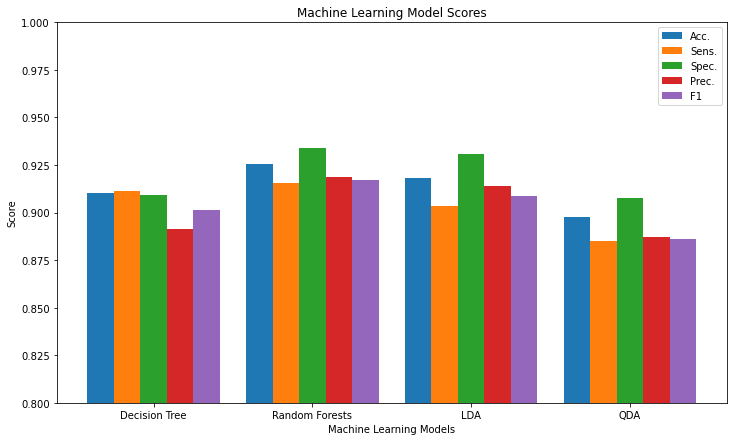

In [78]:
columns = ['Decision Tree', 'Random Forests','LDA', 'QDA']

fig, axs = plt.subplots(figsize=(12,7))
axs.set_ylim(0.8, 1)
X_axis = np.arange(0, 2.4, 0.6)
acc_list = []
sens_list = []
spec_list = []
prec_list = []
f1_list = []

for model_list in main2_eval:
    acc_list.append(model_list[0])
    sens_list.append(model_list[1])
    spec_list.append(model_list[2])
    prec_list.append(model_list[3])
    f1_list.append(model_list[4])

plt.bar(X_axis - 0.2, acc_list, 0.1, label = 'Acc.')
plt.bar(X_axis - 0.1, sens_list, 0.1, label = 'Sens.')
plt.bar(X_axis, spec_list, 0.1, label = 'Spec.')
plt.bar(X_axis + 0.1, prec_list, 0.1, label = 'Prec.')
plt.bar(X_axis + 0.2, f1_list, 0.1, label = 'F1')

plt.xticks(X_axis, columns)
plt.xlabel("Machine Learning Models")
plt.ylabel("Score")
plt.title("Machine Learning Model Scores")
plt.legend(loc='upper right')
plt.show()